In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from proj1_helpers import *
from implementations import *
from plots import *
from utils import *
from validation import *
from preproccess_utils import *
import seaborn as sns
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
import datetime
DATA_TRAIN_PATH = 'data/train.csv' # TODO: download train data and supply path here

labels, input_data, ids = load_csv_data(DATA_TRAIN_PATH)

In [3]:
# splitting data for the training and validation
seed = 46
ratio = 0.8
x_train, y_train, x_test, y_test = split_data(input_data, labels, ratio=ratio, seed=seed)

In [4]:
# splitting into 4 groups and removing -999
x_trains, y_trains, del_columns = preproccess(x_train, y_train)

In [5]:
# remove correlated columns
x_trains, del_columns_cor = correletions(x_trains)

In [6]:
# remove outliers
x_trains, y_trains = remove_outliers(x_trains, y_trains)

shape befor jet  1 79879
shape after 78862
shape befor jet  2 62041
shape after 60674
shape befor jet  3 40374
shape after 39199
shape befor jet  4 17706
shape after 17122


In [7]:
# data normalization
x_trains, y_trains, means, stds = normalization(x_trains, y_trains)

jet : 1, shape y : (78862,), shape x : (78862, 17)
jet : 2, shape y : (60674,), shape x : (60674, 19)
jet : 3, shape y : (39199,), shape x : (39199, 24)
jet : 4, shape y : (17122,), shape x : (17122, 26)


In [8]:
# applying preprocces to the test
x_tests, y_tests = preproccess_test(x_test, y_test, del_columns, del_columns_cor, means, stds)

## Do your thing crazy machine learning thing here :) ...

## Least Squares GD

In [13]:
max_iters = 1000
gamma = 0.08
y_preds = []
for i in range(4):
    initial_w = np.random.rand((x_trains[i].shape[1]))
    w, loss = least_squares_GD(y_trains[i], x_trains[i], initial_w, max_iters, gamma, plot_loss = False)

    y_pred = predict_labels(w, x_tests[i])
    y_preds.append(y_pred)

y_preds
    
print("accuracy :", accuracy(np.array(np.concatenate(y_preds)), y_tests))

accuracy : 0.7441


### Cross validation for least squares GD

100%|██████████| 6/6 [04:23<00:00, 43.85s/it]


Accuracy is 0.7489


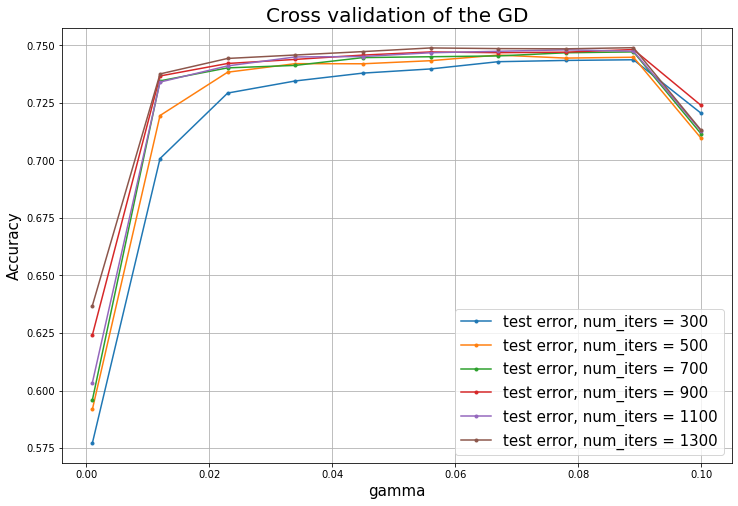

In [18]:
# parameters setting
type_ = 'GD'
bd_left = -3
bd_right = -1
# grid for hyperparameters
gammas = np.linspace(10**bd_left, 10**bd_right, 10)
max_iters = np.arange(300, 1500, 200)
cross_validation_demo(type_=type_, y=jet_labels, tx=jet_groups, bd_left=bd_left, bd_right=bd_right, gammas=gammas, max_iters=max_iters, seed=seed)

**Gradient decent converges if gamma < 0.09.  
In this setting the best gamma = 0.08 and the best max_iter = 500.  
Best accutacy = 0.7470**

## Least Squares SGD

In [8]:
max_iters = 1500
gamma = 0.08
y_preds = []
for i in range(4):
    initial_w = np.random.rand((x_trains[i].shape[1]))
    w, loss = least_squares_SGD(y_trains[i], x_trains[i], initial_w, max_iters, gamma, plot_loss = False)

    y_pred = predict_labels(w, x_tests[i])
    y_preds.append(y_pred)
              
print("accuracy :", accuracy(np.array(np.concatenate(y_preds)), y_tests))

accuracy : 0.7121257574848503


### Cross validation for least squares SGD

100%|██████████| 5/5 [01:59<00:00, 23.95s/it]


Accuracy is 0.7232


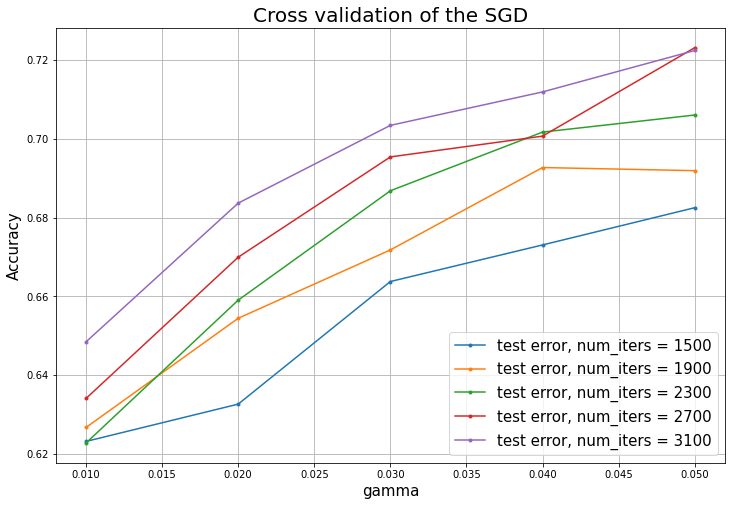

In [120]:
# parameters setting
type_ ='SGD'
bd_left = -2
bd_right = -2
# grid for hyperparameters
gammas = np.linspace(10**bd_left, 8*10**bd_right, 8)
max_iters = np.arange(1500, 3400, 400)
cross_validation_demo(type_=type_, y=jet_labels, tx=jet_groups, bd_left=bd_left, bd_right=bd_right, gammas=gammas, max_iters=max_iters, seed=seed)

## Least Squares

In [13]:
y_preds = []
for i in range(4):
    w, loss = least_squares(y_trains[i], x_trains[i])

    y_pred = predict_labels(w, x_tests[i])
    y_preds.append(y_pred)

print("accuracy :", accuracy(np.array(np.concatenate(y_preds)), y_tests))

accuracy : 0.7556199848908671


## Ridge regression

In [14]:
lambda_ = 1e-7
y_preds = []
for i in range(4):
    w, loss = ridge_regression(y_trains[i], x_trains[i], lambda_)
    y_pred = predict_labels(w, x_tests[i])
    y_preds.append(y_pred)
print("accuracy :", accuracy(np.array(np.concatenate(y_preds)), y_tests))

accuracy : 0.7556199848908671


100%|██████████| 4/4 [03:45<00:00, 56.44s/it]


Accuracy is 0.8050


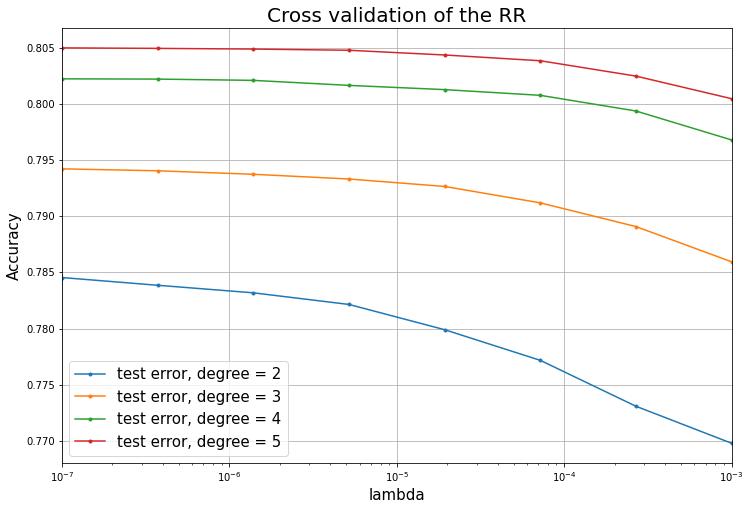

In [11]:
# parameters setting
type_ = 'RR'
bd_left = -7
bd_right = -3
# grid for hyperparameters
lambdas = np.logspace(bd_left, bd_right, 8)
degrees = np.arange(2, 6)
cross_validation_demo(type_=type_, y=jet_labels, tx=jet_groups, bd_left=bd_left, bd_right=bd_right, lambdas=lambdas, degrees=degrees, seed=seed)

## Logistic Regression

In [12]:
max_iters = 500
gamma = 0.1
y_preds = []
for i in range(4):
    initial_w = np.random.rand((x_trains[i].shape[1]))
    w, loss = logistic_regression(y_trains[i], x_trains[i], initial_w, max_iters, gamma, plot_loss = False)
    y_pred = predict_labels_lr(w, x_tests[i])
    y_preds.append(y_pred)
              
print("accuracy :", accuracy(np.array(np.concatenate(y_preds)), y_tests))

accuracy : 0.7311653766924662


### Cross validation for logistic regression

In [8]:
# parameters setting
type_ = 'LR'
bd_left = -3
bd_right = -1
# grid for hyperparameters
# gammas = np.linspace(10**bd_left, 10**bd_right, 10)
gammas = np.logspace(bd_left, bd_right, 8)
max_iters = np.arange(400, 3000, 200)
cross_validation_demo(type_=type_, y=jet_labels, tx=jet_groups, bd_left=bd_left, bd_right=bd_right, gammas=gammas, max_iters=max_iters, seed=seed)

## Logistic Regression with Regularization

### with degree

In [16]:
max_iters = 1500
gamma = 0.1
lambda_ = 1e-5
y_preds = []
w_lrr = []
degree = 2
for i in range(4):
#     initial_w = np.random.rand((x_trains[i].shape[1]))
    x_train_poly = build_poly(x_trains[i], degree)
    x_test_poly = build_poly(x_tests[i], degree)
    initial_w = np.random.rand((x_train_poly.shape[1]))
    w, loss = reg_logistic_regression(y_trains[i], x_train_poly, lambda_, initial_w, max_iters, gamma, plot_loss = False)
    y_pred = predict_labels(w, x_test_poly)
    y_preds.append(y_pred)
    w_lrr.append(w)
              
print("accuracy :", accuracy(np.array(np.concatenate(y_preds)), y_tests))

accuracy : 0.7329053418931621


### without degree

In [16]:
max_iters = 1500
gamma = 0.1
lambda_ = 1e-5
y_preds = []
w_lrr = []
for i in range(4):
    initial_w = np.random.rand((x_trains[i].shape[1]))
    w, loss = reg_logistic_regression(y_trains[i], x_trains[i], lambda_, initial_w, max_iters, gamma, plot_loss = False)
    y_pred = predict_labels_for_log(w, x_tests[i])
    y_preds.append(y_pred)
    w_lrr.append(w)
              
print("accuracy :", accuracy(np.array(np.concatenate(y_preds)), y_tests))

accuracy : 0.7416338281234048


### Cross validation for logistic regression with regularizarion

100%|██████████| 3/3 [03:45<00:00, 75.02s/it]


Accuracy is 0.7411


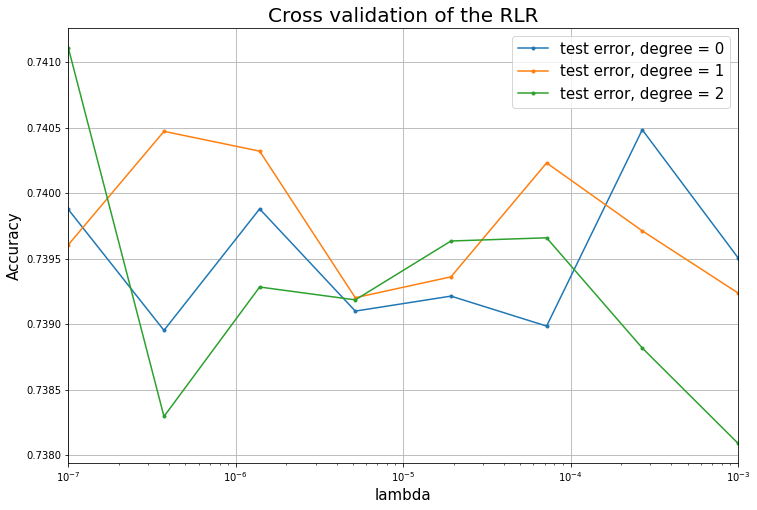

In [16]:
# parameters setting
type_ = 'RLR'
bd_left = -7
bd_right = -3
max_iters = 500
gammas = 0.1
# grid for hyperparameters
lambdas = np.logspace(bd_left, bd_right, 8)
degrees = np.arange(3)
cross_validation_demo(type_=type_, y=jet_labels, tx=jet_groups, bd_left=bd_left, bd_right=bd_right, lambdas=lambdas, degrees=degrees, max_iters=max_iters, gammas=gammas, seed=seed)

# 2. Confusion matrix 

Text(51.0, 0.5, 'expected')

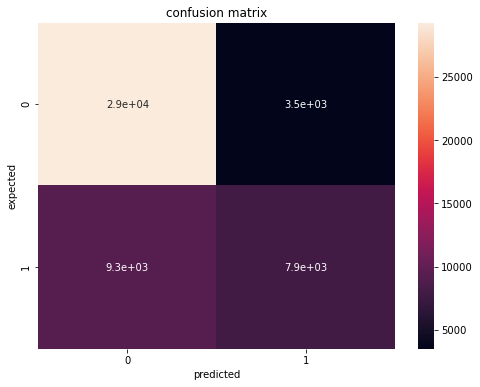

In [153]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
#confusion matrix
fig, ax = plt.subplots(figsize = (8, 6))
cm = confusion_matrix(np.array(np.concatenate(y_tests)), np.array(np.concatenate(y_preds)), labels = [-1.0, 1.0])
sn.heatmap(cm, annot = True, axes = ax)
plt.title("confusion matrix")
plt.xlabel("predicted")
plt.ylabel("expected")


## Generate predictions and save ouput in csv format for submission:

In [3]:
DATA_TEST_PATH = 'data/test.csv'  # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [10]:
jet_groups_test, jet_idxs = preproccess_test(tX_test, ids_test, del_columns, del_columns_cor, means, stds)

### For NOT logistic regression

In [ ]:
y_preds = []
for i in range(4):
    y_pred = predict_labels(w_lrr[i], jet_groups_test[i])
    y_preds.append(y_pred)
final_pred = np.array(np.concatenate(y_preds))

### For logistic regression

In [14]:
y_preds = []
for i in range(4):
    y_pred = predict_labels_for_log(w_lrr[i], jet_groups_test[i])
    y_preds.append(y_pred)
final_pred = np.array(np.concatenate(y_preds))

In [12]:
OUTPUT_PATH = 'data/pred.csv' # TODO: fill in desired name of output file for submission
create_csv_submission(jet_idxs, final_pred, OUTPUT_PATH)